# Measuring performance
With mean return and std

In [2]:
import pandas as pd
stocks = pd.read_csv('stocks.csv', header=[0, 1], index_col=[0], parse_dates=[0])
stocks.head()


Adj Close                                                \
                 AAPL        AMT        AMZN         BA        GOOG   
Date                                                                  
2012-08-02  18.559689  60.370384  230.809998  59.600883  313.201050   
2012-08-03  18.801235  61.106293  234.970001  60.279739  319.467560   
2012-08-06  19.010412  60.629620  233.990005  60.346012  320.209778   
2012-08-07  18.960329  58.973797  236.559998  61.645802  319.074036   
2012-08-08  18.928265  58.572399  234.380005  61.761700  319.915863   

                                                                   ...  \
                  HON        JNJ        JPM       MSFT        NEE  ...   
Date                                                               ...   
2012-08-02  44.378555  52.226257  26.925488  23.833302  13.465865  ...   
2012-08-03  45.609566  52.737465  27.629822  24.290535  13.594386  ...   
2012-08-06  45.400528  52.523815  27.790600  24.453831  13.502313  ...   
2012-08-07  45.346321  52.104168  28.334158  24.706944  13.398730  ...   
2012-08-08  45.625057  52.149963  28.448994  24.764091  13.389136  ...   

             Volume                                                            \
                HON       JNJ       JPM      MSFT      NEE      TSLA      UNH   
Date                                                                            
2012-08-02  3345083  13536000  36675000  39520500  5366800   6525500  7320500   
2012-08-03  2899191  10898800  24516300  35859400  4294400   6047500  6408000   
2012-08-06  2156666   8723200  18979200  27471800  4401600   7641000  4982600   
2012-08-07  4104599  11268400  37225800  28002900  5441200  11936000  6590800   
2012-08-08  2883981   6573100  18672400  26257600  4366400   6544500  5718000   

                                         
                   V      WMT       XOM  
Date                                     
2012-08-02  11112400  8093000  14530100  
2012-08-03  12934400  8740000  13982500  
2012-08-06   9227600  6117500   9626400  
2012-08-07  13179200  7614500  12399800  
2012-08-08   7962800  6578300  12864500  

[5 rows x 90 columns]

In [9]:
close = stocks.loc[:, 'Close'].copy()
close.head()

,AAPL,AMT,AMZN,BA,GOOG,HON,JNJ,JPM,MSFT,NEE,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,
2012-08-02,21.706785,72.190002,230.809998,71.989998,313.201050,54.647141,68.449997,35.169998,29.190001,17.549999,5.220,51.099998,32.317501,74.050003,85.879997
2012-08-03,21.989286,73.070000,234.970001,72.809998,319.467560,56.162998,69.120003,36.090000,29.750000,17.717501,5.454,51.610001,32.744999,74.550003,87.550003
2012-08-06,22.233929,72.500000,233.990005,72.889999,320.209778,55.905590,68.839996,36.299999,29.950001,17.597500,5.654,51.000000,32.757500,74.279999,87.449997
2012-08-07,22.175358,70.519997,236.559998,74.459999,319.074036,55.838852,68.290001,37.009998,30.260000,17.462500,6.050,52.540001,32.599998,73.989998,87.919998
2012-08-08,22.137857,70.040001,234.380005,74.599998,319.915863,56.182068,68.349998,37.160000,30.330000,17.450001,5.818,52.730000,32.787498,74.309998,88.279999


In [17]:
aapl = close.AAPL.to_frame() # single column returns a series
aapl

,AAPL
Date,
2012-08-02,21.706785
2012-08-03,21.989286
2012-08-06,22.233929
2012-08-07,22.175358
2012-08-08,22.137857
...,...
2022-05-10,154.509995
2022-05-11,146.500000
2022-05-12,142.559998


In [22]:
# get the daily return
ret = aapl.pct_change().dropna()
ret.head()

,AAPL
Date,
2012-08-03,0.013014
2012-08-06,0.011126
2012-08-07,-0.002634
2012-08-08,-0.001691
2012-08-09,0.001404


In [23]:
ret.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2462 entries, 2012-08-03 to 2022-05-16
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2462 non-null   float64
dtypes: float64(1)
memory usage: 38.5 KB


In [24]:
ret.describe()

,AAPL
count,2462.000000
mean,0.000936
std,0.018011
min,-0.128647
25%,-0.007410
50%,0.000752
75%,0.010259
max,0.119808


In [27]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<AxesSubplot:ylabel='Frequency'>

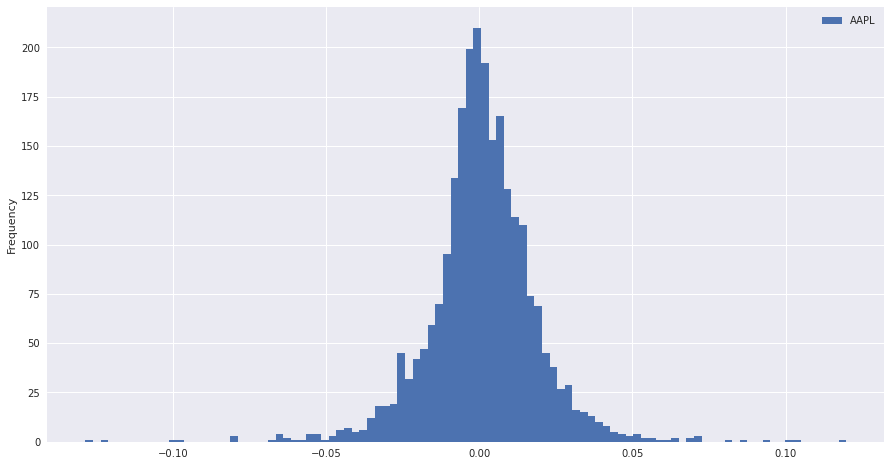

In [29]:
# histogram returns a normal bell curve skewed little bit to the positive side.
ret.plot(kind = "hist", figsize=(15, 8), bins=100)

In [30]:
ret.mean()

AAPL    0.000936
dtype: float64

In [32]:
# this is very small because it's based on the daily return
ret.std()

AAPL    0.018011
dtype: float64

In [35]:
# converting daily return into yearly return
ret.mean().add(1).pow(252).sub(1).mul(100)

AAPL    26.578496
dtype: float64

In [36]:
# yearly std
import numpy as np
np.sqrt(ret.var() * 252) 

AAPL    0.285923
dtype: float64

In [37]:
# same as
ret.std().mul(np.sqrt(252)) 

AAPL    0.285923
dtype: float64

# Return and Risk

In [47]:
base_prices = close.iloc[0]
normalized = close.div(base_prices).mul(100)
normalized.head()

,AAPL,AMT,AMZN,BA,GOOG,HON,JNJ,JPM,MSFT,NEE,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,
2012-08-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2012-08-03,101.301442,101.219002,101.802350,101.139047,102.000795,102.773901,100.978825,102.615872,101.918463,100.954424,104.482763,100.998047,101.322806,100.675219,101.944581
2012-08-06,102.428473,100.429419,101.377760,101.250176,102.237773,102.302864,100.569758,103.212969,102.603632,100.270659,108.314177,99.804308,101.361487,100.310595,101.828132
2012-08-07,102.158646,97.686652,102.491227,103.431034,101.875149,102.180739,99.766259,105.231732,103.665638,99.501427,115.900391,102.818009,100.874131,99.918967,102.375409
2012-08-08,101.985887,97.021746,101.546730,103.625504,102.143931,102.808797,99.853910,105.658237,103.905445,99.430208,111.455940,103.189826,101.454312,100.351107,102.794599


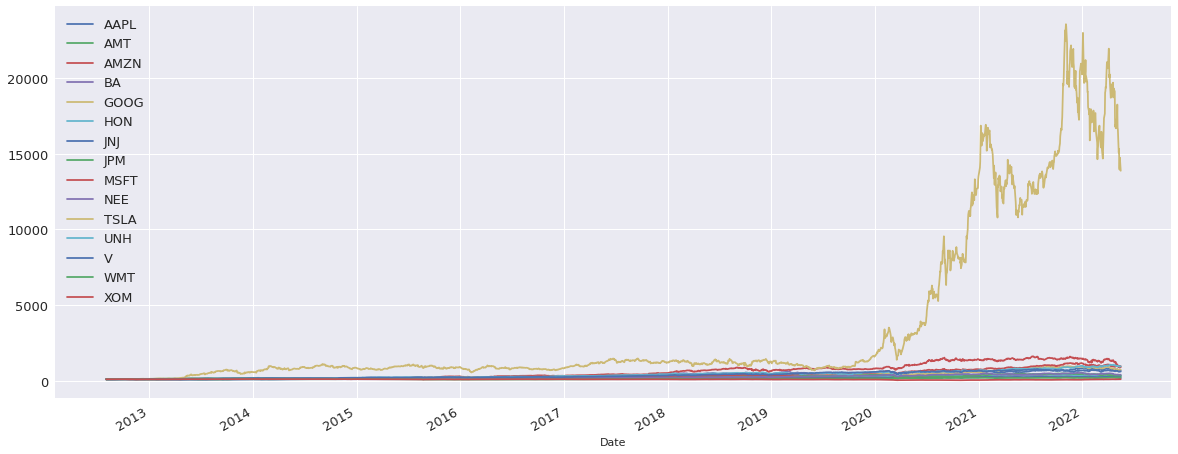

In [50]:
normalized.plot(figsize=(20, 8), fontsize=13)
plt.legend(fontsize=13)
plt.show()

In [53]:
ret = close.pct_change().dropna()
ret

,AAPL,AMT,AMZN,BA,GOOG,HON,JNJ,JPM,MSFT,NEE,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,
2012-08-03,0.013014,0.012190,0.018023,0.011390,0.020008,0.027739,0.009788,0.026159,0.019185,0.009544,0.044828,0.009980,0.013228,0.006752,0.019446
2012-08-06,0.011126,-0.007801,-0.004171,0.001099,0.002323,-0.004583,-0.004051,0.005819,0.006723,-0.006773,0.036670,-0.011819,0.000382,-0.003622,-0.001142
2012-08-07,-0.002634,-0.027310,0.010983,0.021539,-0.003547,-0.001194,-0.007989,0.019559,0.010351,-0.007672,0.070039,0.030196,-0.004808,-0.003904,0.005375
2012-08-08,-0.001691,-0.006807,-0.009215,0.001880,0.002638,0.006147,0.000879,0.004053,0.002313,-0.000716,-0.038347,0.003616,0.005752,0.004325,0.004095
2012-08-09,0.001404,0.003427,-0.001365,-0.004290,0.000187,0.000679,-0.000439,-0.006459,0.005605,-0.007880,0.011000,-0.013465,-0.020130,-0.006190,-0.000906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-10,0.016112,-0.027435,0.000643,-0.002700,0.013269,0.004176,-0.001353,-0.024372,0.018596,-0.010182,0.016427,0.003269,0.003005,-0.014077,0.006630
2022-05-11,-0.051841,-0.000133,-0.032032,-0.026777,-0.005441,-0.014119,-0.005421,-0.006308,-0.033210,0.003000,-0.082546,-0.003811,0.016221,-0.010457,0.020819
2022-05-12,-0.026894,0.003471,0.014791,-0.048304,-0.007020,0.004687,0.009879,-0.000846,-0.019958,-0.024074,-0.008174,-0.015119,-0.013979,-0.000948,-0.005646


In [54]:
ret.head()

,AAPL,AMT,AMZN,BA,GOOG,HON,JNJ,JPM,MSFT,NEE,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,
2012-08-03,0.013014,0.012190,0.018023,0.011390,0.020008,0.027739,0.009788,0.026159,0.019185,0.009544,0.044828,0.009980,0.013228,0.006752,0.019446
2012-08-06,0.011126,-0.007801,-0.004171,0.001099,0.002323,-0.004583,-0.004051,0.005819,0.006723,-0.006773,0.036670,-0.011819,0.000382,-0.003622,-0.001142
2012-08-07,-0.002634,-0.027310,0.010983,0.021539,-0.003547,-0.001194,-0.007989,0.019559,0.010351,-0.007672,0.070039,0.030196,-0.004808,-0.003904,0.005375
2012-08-08,-0.001691,-0.006807,-0.009215,0.001880,0.002638,0.006147,0.000879,0.004053,0.002313,-0.000716,-0.038347,0.003616,0.005752,0.004325,0.004095
2012-08-09,0.001404,0.003427,-0.001365,-0.004290,0.000187,0.000679,-0.000439,-0.006459,0.005605,-0.007880,0.011000,-0.013465,-0.020130,-0.006190,-0.000906


In [55]:
ret.describe()

,AAPL,AMT,AMZN,BA,GOOG,HON,JNJ,JPM,MSFT,NEE,TSLA,UNH,V,WMT,XOM
count,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000,2462.000000
mean,0.000936,0.000578,0.001110,0.000503,0.000941,0.000612,0.000450,0.000632,0.001027,0.000654,0.002627,0.001044,0.000857,0.000358,0.000157
std,0.018011,0.014591,0.019556,0.023729,0.016272,0.013959,0.011052,0.016679,0.016481,0.013474,0.035401,0.015841,0.015583,0.012356,0.016336
min,-0.128647,-0.151638,-0.140494,-0.238484,-0.111008,-0.120868,-0.100379,-0.149649,-0.147390,-0.134171,-0.210628,-0.172769,-0.135472,-0.101832,-0.122248
25%,-0.007410,-0.006398,-0.008078,-0.009023,-0.006278,-0.005430,-0.004433,-0.007040,-0.006552,-0.005558,-0.014471,-0.006705,-0.006473,-0.005469,-0.007172
50%,0.000752,0.000745,0.001012,0.000514,0.000797,0.000718,0.000345,0.000372,0.000728,0.001124,0.001456,0.000968,0.001312,0.000275,-0.000115
75%,0.010259,0.007815,0.010948,0.010144,0.008826,0.007158,0.005914,0.008410,0.009119,0.007131,0.019111,0.008346,0.008461,0.006192,0.007412
max,0.119808,0.122219,0.141311,0.243186,0.160524,0.150684,0.079977,0.180125,0.142169,0.136904,0.243951,0.127989,0.138426,0.117085,0.126868


In [56]:
# Transpose the above table because there are more columns and rows
ret.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL,2462.0,0.000936,0.018011,-0.128647,-0.007410,0.000752,0.010259,0.119808
AMT,2462.0,0.000578,0.014591,-0.151638,-0.006398,0.000745,0.007815,0.122219
AMZN,2462.0,0.001110,0.019556,-0.140494,-0.008078,0.001012,0.010948,0.141311
BA,2462.0,0.000503,0.023729,-0.238484,-0.009023,0.000514,0.010144,0.243186
GOOG,2462.0,0.000941,0.016272,-0.111008,-0.006278,0.000797,0.008826,0.160524
HON,2462.0,0.000612,0.013959,-0.120868,-0.005430,0.000718,0.007158,0.150684
JNJ,2462.0,0.000450,0.011052,-0.100379,-0.004433,0.000345,0.005914,0.079977
JPM,2462.0,0.000632,0.016679,-0.149649,-0.007040,0.000372,0.008410,0.180125
MSFT,2462.0,0.001027,0.016481,-0.147390,-0.006552,0.000728,0.009119,0.142169
NEE,2462.0,0.000654,0.013474,-0.134171,-0.005558,0.001124,0.007131,0.136904


In [60]:
# Only select mean and std
cols = ["mean", "std"]
mean_return_and_std = ret.describe().T.loc[:, cols]
mean_return_and_std

,mean,std
AAPL,0.000936,0.018011
AMT,0.000578,0.014591
AMZN,0.001110,0.019556
BA,0.000503,0.023729
GOOG,0.000941,0.016272
HON,0.000612,0.013959
JNJ,0.000450,0.011052
JPM,0.000632,0.016679
MSFT,0.001027,0.016481
NEE,0.000654,0.013474


In [64]:
df = mean_return_and_std
mean_return_and_std['annual_return'] = df.loc[:, "mean"].add(1).pow(252).sub(1).mul(100) 
mean_return_and_std

,mean,std,annual_return
AAPL,0.000936,0.018011,26.578496
AMT,0.000578,0.014591,15.665315
AMZN,0.001110,0.019556,32.250604
BA,0.000503,0.023729,13.512549
GOOG,0.000941,0.016272,26.746478
HON,0.000612,0.013959,16.671270
JNJ,0.000450,0.011052,11.994514
JPM,0.000632,0.016679,17.244536
MSFT,0.001027,0.016481,29.514967
NEE,0.000654,0.013474,17.899103


In [89]:
mean_return_and_std["annual_std"] = df.loc[:,"std"].mul(np.sqrt(252)).mul(100)
mean_return_and_std

,mean,std,annual_return,annual_std
AAPL,0.000936,0.018011,26.578496,28.592293
AMT,0.000578,0.014591,15.665315,23.161722
AMZN,0.001110,0.019556,32.250604,31.043758
BA,0.000503,0.023729,13.512549,37.668068
GOOG,0.000941,0.016272,26.746478,25.831524
HON,0.000612,0.013959,16.671270,22.160001
JNJ,0.000450,0.011052,11.994514,17.545205
JPM,0.000632,0.016679,17.244536,26.477739
MSFT,0.001027,0.016481,29.514967,26.162960
NEE,0.000654,0.013474,17.899103,21.389143


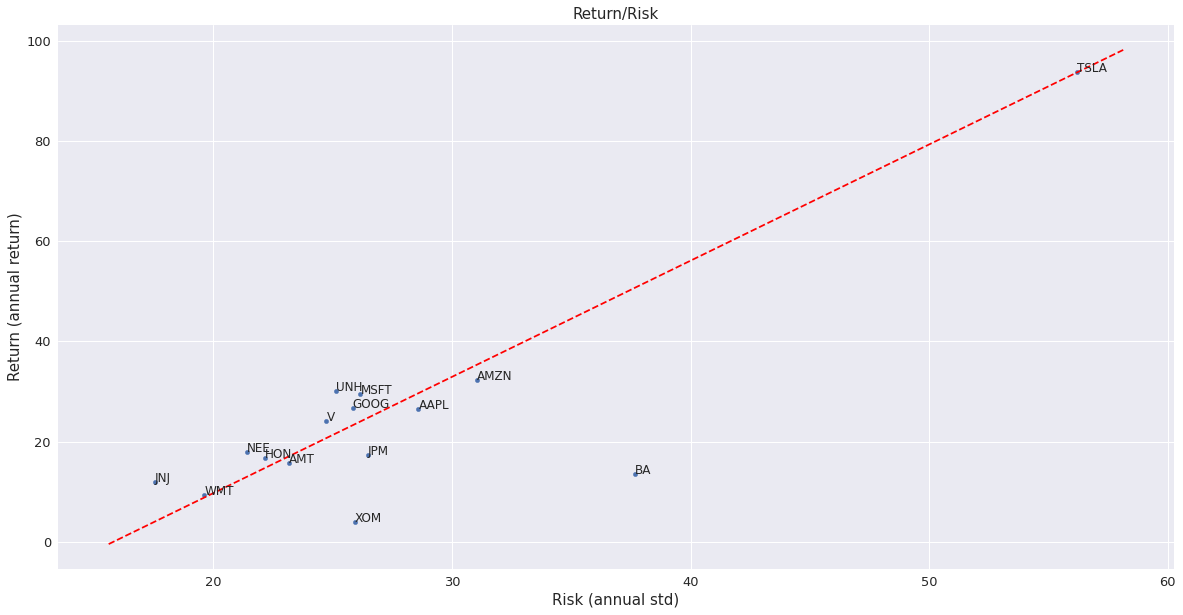

In [90]:
# Draw a scatter plot of mean vs std
from pandas.core.frame import DataFrame

def get_xy(df: DataFrame, index: str):
    return (df.loc[index, 'annual_std'] + 0.002, df.loc[index, 'annual_return'] + 0.002)

mean_return_and_std.plot.scatter(x="annual_std", y="annual_return", figsize=(20, 10), fontsize=13)
for ticker in mean_return_and_std.index:
    plt.annotate(ticker, xy=get_xy(mean_return_and_std, ticker), size=12)
plt.xlabel("Risk (annual std)", fontsize=15)
plt.ylabel("Return (annual return)", fontsize=15)
plt.title("Return/Risk", fontsize=15)
plt.plot(plt.xlim(), plt.ylim(), ls="--", color="red")
plt.show()


In [96]:
# sort by performance (return / risk)
mean_return_and_std["return/risk"] = mean_return_and_std.loc[:, "annual_return"].div(mean_return_and_std.loc[:, "annual_std"])
mean_return_and_std.sort_values("return/risk", ascending=False)

,mean,std,annual_return,annual_std,return/risk
TSLA,0.002627,0.035401,93.707907,56.197270,1.667481
UNH,0.001044,0.015841,30.062286,25.146381,1.195492
MSFT,0.001027,0.016481,29.514967,26.162960,1.128120
AMZN,0.001110,0.019556,32.250604,31.043758,1.038876
GOOG,0.000941,0.016272,26.746478,25.831524,1.035420
V,0.000857,0.015583,24.102673,24.736755,0.974367
AAPL,0.000936,0.018011,26.578496,28.592293,0.929569
NEE,0.000654,0.013474,17.899103,21.389143,0.836831
HON,0.000612,0.013959,16.671270,22.160001,0.752314
JNJ,0.000450,0.011052,11.994514,17.545205,0.683635


# Covariance & Correlation
Covariance and correlation are useful tools for diversifying portfolio and comparing stocks within sectors.
- correlation - measures how two stocks are moving similarly, in scale.
- covariance - measures how two stocks are moving in opposite direction, out of scale.

In [98]:
ret.head()

,AAPL,AMT,AMZN,BA,GOOG,HON,JNJ,JPM,MSFT,NEE,TSLA,UNH,V,WMT,XOM
Date,,,,,,,,,,,,,,,
2012-08-03,0.013014,0.012190,0.018023,0.011390,0.020008,0.027739,0.009788,0.026159,0.019185,0.009544,0.044828,0.009980,0.013228,0.006752,0.019446
2012-08-06,0.011126,-0.007801,-0.004171,0.001099,0.002323,-0.004583,-0.004051,0.005819,0.006723,-0.006773,0.036670,-0.011819,0.000382,-0.003622,-0.001142
2012-08-07,-0.002634,-0.027310,0.010983,0.021539,-0.003547,-0.001194,-0.007989,0.019559,0.010351,-0.007672,0.070039,0.030196,-0.004808,-0.003904,0.005375
2012-08-08,-0.001691,-0.006807,-0.009215,0.001880,0.002638,0.006147,0.000879,0.004053,0.002313,-0.000716,-0.038347,0.003616,0.005752,0.004325,0.004095
2012-08-09,0.001404,0.003427,-0.001365,-0.004290,0.000187,0.000679,-0.000439,-0.006459,0.005605,-0.007880,0.011000,-0.013465,-0.020130,-0.006190,-0.000906


In [99]:
ret.cov()

,AAPL,AMT,AMZN,BA,GOOG,HON,JNJ,JPM,MSFT,NEE,TSLA,UNH,V,WMT,XOM
AAPL,0.000324,0.000091,0.000166,0.000158,0.000157,0.000112,0.000068,0.000121,0.000175,0.000072,0.000218,0.000116,0.000140,0.000067,0.000090
AMT,0.000091,0.000213,0.000085,0.000100,0.000087,0.000082,0.000073,0.000085,0.000105,0.000107,0.000096,0.000093,0.000106,0.000061,0.000065
AMZN,0.000166,0.000085,0.000382,0.000127,0.000191,0.000087,0.000059,0.000096,0.000183,0.000061,0.000239,0.000098,0.000142,0.000058,0.000071
BA,0.000158,0.000100,0.000127,0.000563,0.000147,0.000205,0.000084,0.000228,0.000146,0.000098,0.000225,0.000142,0.000180,0.000057,0.000199
GOOG,0.000157,0.000087,0.000191,0.000147,0.000265,0.000111,0.000068,0.000120,0.000178,0.000070,0.000195,0.000111,0.000146,0.000056,0.000092
HON,0.000112,0.000082,0.000087,0.000205,0.000111,0.000195,0.000076,0.000160,0.000118,0.000078,0.000131,0.000112,0.000135,0.000051,0.000130
JNJ,0.000068,0.000073,0.000059,0.000084,0.000068,0.000076,0.000122,0.000079,0.000077,0.000065,0.000054,0.000085,0.000078,0.000055,0.000068
JPM,0.000121,0.000085,0.000096,0.000228,0.000120,0.000160,0.000079,0.000278,0.000127,0.000067,0.000138,0.000128,0.000150,0.000056,0.000161
MSFT,0.000175,0.000105,0.000183,0.000146,0.000178,0.000118,0.000077,0.000127,0.000272,0.000085,0.000209,0.000122,0.000155,0.000070,0.000089
NEE,0.000072,0.000107,0.000061,0.000098,0.000070,0.000078,0.000065,0.000067,0.000085,0.000182,0.000079,0.000081,0.000077,0.000058,0.000062


In [100]:
ret.corr()

,AAPL,AMT,AMZN,BA,GOOG,HON,JNJ,JPM,MSFT,NEE,TSLA,UNH,V,WMT,XOM
AAPL,1.000000,0.346549,0.471940,0.368774,0.536168,0.446795,0.342751,0.403017,0.590051,0.298207,0.342488,0.408059,0.497576,0.301573,0.306790
AMT,0.346549,1.000000,0.296995,0.289863,0.366892,0.401174,0.451912,0.349198,0.434667,0.543085,0.185035,0.400611,0.464785,0.338252,0.270895
AMZN,0.471940,0.296995,1.000000,0.273405,0.601151,0.319165,0.273755,0.293072,0.567973,0.232145,0.345487,0.317394,0.465554,0.239529,0.220802
BA,0.368774,0.289863,0.273405,1.000000,0.380246,0.617805,0.319887,0.576254,0.372905,0.307168,0.267297,0.378992,0.488011,0.194042,0.512365
GOOG,0.536168,0.366892,0.601151,0.380246,1.000000,0.489594,0.378236,0.442060,0.663819,0.319224,0.338032,0.429542,0.575831,0.279146,0.345504
HON,0.446795,0.401174,0.319165,0.617805,0.489594,1.000000,0.495639,0.685184,0.512122,0.415588,0.264506,0.505490,0.621022,0.295975,0.568466
JNJ,0.342751,0.451912,0.273755,0.319887,0.378236,0.495639,1.000000,0.426742,0.422397,0.433225,0.137631,0.485271,0.455041,0.405891,0.376086
JPM,0.403017,0.349198,0.293072,0.576254,0.442060,0.685184,0.426742,1.000000,0.460530,0.299623,0.234034,0.483894,0.576266,0.272565,0.589962
MSFT,0.590051,0.434667,0.567973,0.372905,0.663819,0.512122,0.422397,0.460530,1.000000,0.382914,0.358557,0.466546,0.603462,0.345994,0.331774
NEE,0.298207,0.543085,0.232145,0.307168,0.319224,0.415588,0.433225,0.299623,0.382914,1.000000,0.166508,0.378209,0.366909,0.346038,0.282333


In [101]:
import seaborn as sns

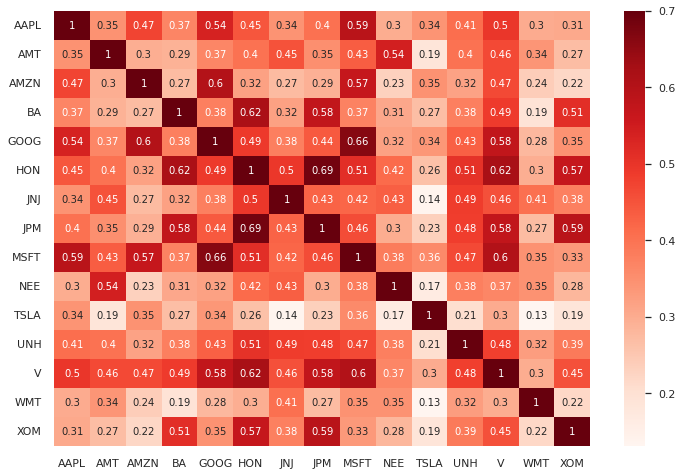

In [109]:
# Create a correlation heatmap
plt.figure(figsize=(12,8))
sns.set(font_scale=1)
sns.heatmap(ret.corr(), cmap="Reds", annot=True, annot_kws={"size": 10}, vmax=0.7)
plt.show()